# Business Case Data Analysis

# Business Case Data Analysis: Extracting Actionable Insights from Yelp Reviews
This section of our project focuses on analyzing Yelp data to gain valuable insights for businesses. We aim to answer critical questions that can inform strategic decision-making and improve customer satisfaction.

## Objectives
Our analysis seeks to address the following key business questions:
1. Identifying top-rated businesses
2. Determining high-performing business categories
3. Analyzing review frequency patterns over time
4. Comparing trending versus consistently top-rated businesses
5. Recognizing business categories prone to negative reviews
6. Uncovering common themes in negative feedback

## Significance
This analysis is crucial for:
- Benchmarking business performance
- Identifying successful industry practices
- Optimizing marketing strategies
- Anticipating and addressing customer concerns
- Enhancing overall customer experience

## Methodology
Our approach involves:
1. Data preparation and cleaning
2. Exploratory data analysis
3. Time series analysis of review patterns
4. Sentiment analysis and categorization
5. Text mining for insight extraction

Through this comprehensive analysis, we aim to provide businesses with data-driven insights to enhance their strategies and improve customer satisfaction in a competitive market landscape.

# Imports

In [6]:
#basic libraries for linear algebra and data procesing
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#text analysis
import spacy
nlp = spacy.load('en_core_web_sm')

#time and warnings
import time
import warnings

#settings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_context('poster', font_scale=0.5)

In [8]:
#loading the datasets

business = pd.read_csv('data/business_prepared.csv')
review = pd.read_csv('data/review_prepared.csv')
user = pd.read_csv('data/user_prepared.csv')

# Data

In [10]:
# "business stars" refers to the average rating that a business receives from its customers. 

In [11]:
print('Total number of reviews: ', len(review))
# the code filters the review DataFrame to include only the rows where the stars column has a value greater than or equal to 4.
print('Positive reviews: ', len(review[review['stars'] >= 4]))
print('Neutral reviews: ', len(review[review['stars'] == 3]))
print('Negative reviews: ', len(review[review['stars'] <= 2]))
print('Useful reviews: ', len(review[review['useful'] > 0]))
print('Cool reviews: ', len(review[review['cool'] > 0]))
print('Funny reviews: ', len(review[review['funny'] > 0]))

Total number of reviews:  229130
Positive reviews:  155617
Neutral reviews:  35268
Negative reviews:  38245
Useful reviews:  134110
Cool reviews:  85432
Funny reviews:  68181


# Business Case Data Analysis
### Counting reviews

There are several types of reviews in the dataset, like useful reviews, cool reviews, and funny reviews. I would add positive (business stars >= 4), neutral (business stars = 3), and negative reviews (business stars <= 2):


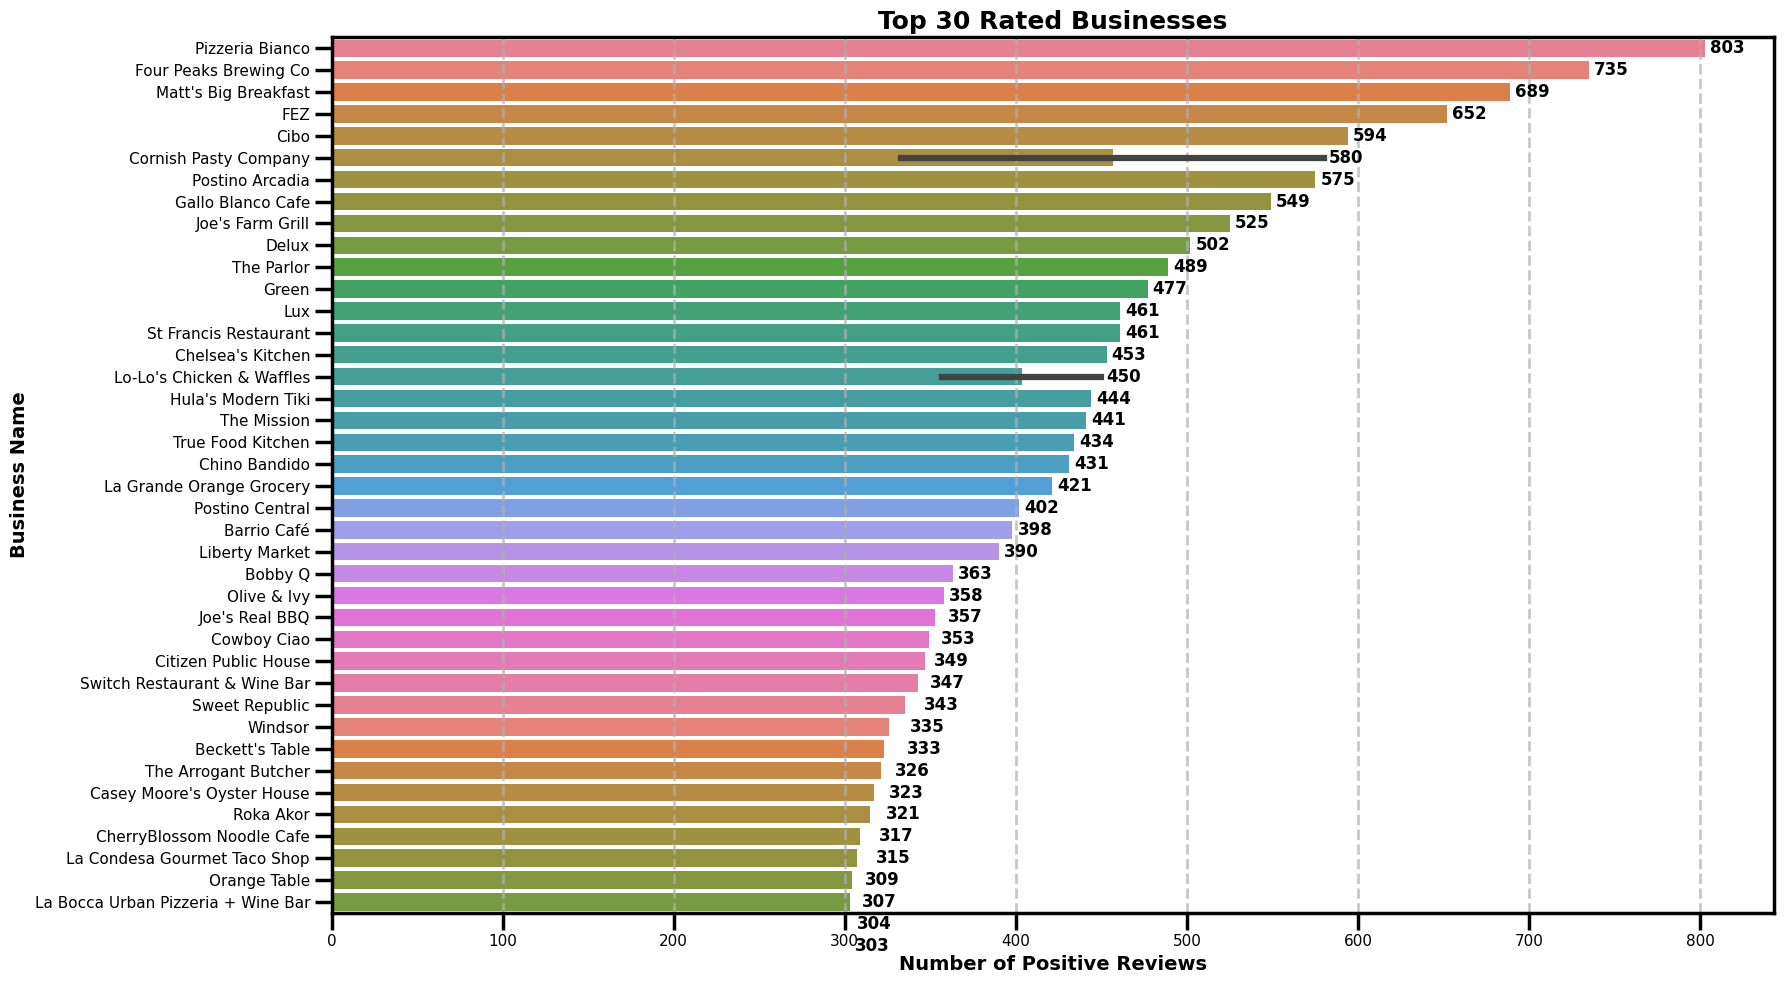

In [24]:
#creating a new dataframe that contains top 50 rated business sorted by the number of positive reviews
biz_good_rating = business[(business['business_stars'] >= 4) & (business['business_review_count'] > 300)]
top_rated = biz_good_rating[['business_name', 
                             'business_review_count', 
                             'business_stars',
                            'business_categories']].sort_values(by='business_review_count', ascending=False)[:50]

#plotting the top 30 businesses
plt.figure(figsize=(18,10))
colors = sns.color_palette("husl", 30)
ax = sns.barplot(data=top_rated, x='business_review_count', y='business_name', palette=colors)
plt.ylabel('Business Name', fontsize=14, fontweight='bold')
plt.xlabel('Number of Positive Reviews', fontsize=14, fontweight='bold')
plt.title('Top 30 Rated Businesses', fontsize=18, fontweight='bold')

# Add value labels to the end of each bar
for i, v in enumerate(top_rated['business_review_count']):
    ax.text(v + 3, i, str(v), color='black', va='center', fontweight='bold')

# Adjust layout and display grid
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# What businesses are getting top reviews?

Top three rated businesses are:
1. Pizzeria Bianco (stars: 4.0) with 803 reviews
2. Four Peaks Brewing Co (stars: 4.5) with 735 reviews 
3. Matt's Big Breakfast (stars: 4.0) with 689 reviews.

 ## Sample data
 data = {
    'business_name': ['Business A', 'Business B', 'Business C'],
   'business_categories': ['Restaurant;Cafe', 'Cafe;Bakery', 'Bakery;Restaurant']
 }
 top_rated = pd.DataFrame(data)


 Separating values in categories and saving it to a list, and removing leading and trailing white space
 cat_top_rated_list = top_rated['business_categories'].str.split(';').sum()
 cat_top_rated_list = [x.strip() for x in cat_top_rated_list]


 ### Output the result
 print(cat_top_rated_list)
 ['Restaurant', 'Cafe', 'Cafe', 'Bakery', 'Bakery', 'Restaurant']


 This code takes the business_categories column, splits the semicolon-separated strings into individual categories, 
 concatenates them into a single list, and removes any leading or trailing whitespace from each category. 
 The result is a clean list of all categories from the top-rated businesses.

In [25]:
#separating values in categories and saving it to a list, and removing leading and trailing white space
cat_top_rated_list = top_rated.business_categories.str.split(';').sum()
cat_top_rated_list = [x.strip() for x in cat_top_rated_list]

#converting given values to a dictionary
cat_top_rated_dict = {}
for c in range(len(cat_top_rated_list)):
    cat_top_rated_dict[cat_top_rated_list[c]] = cat_top_rated_list.count(cat_top_rated_list[c])

#converting the given dictionary to a DataFrame with categories of top reviewed businesses
cat_top_rated = pd.DataFrame.from_dict(data = cat_top_rated_dict,orient="index")
cat_top_rated.reset_index(inplace = True)
cat_top_rated.columns = ['category', 'occurance']

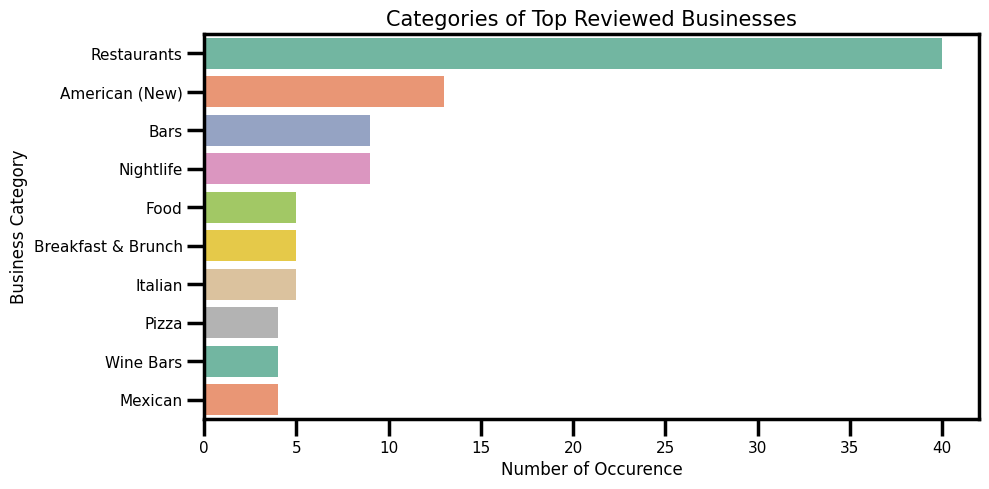

In [26]:
#visualizing the share of each category present in the top 30 reviewed businesses
size = cat_top_rated.nlargest(10,'occurance')['occurance']
label = cat_top_rated.nlargest(10,'occurance')['category']

plt.figure(figsize=(10,5))
sns.barplot(data = cat_top_rated, x = size, y = label, palette = 'Set2')
plt.ylabel('Business Category', fontsize=12)
plt.xlabel('Number of Occurence', fontsize=12)
plt.title('Categories of Top Reviewed Businesses', fontsize=15)
plt.show();

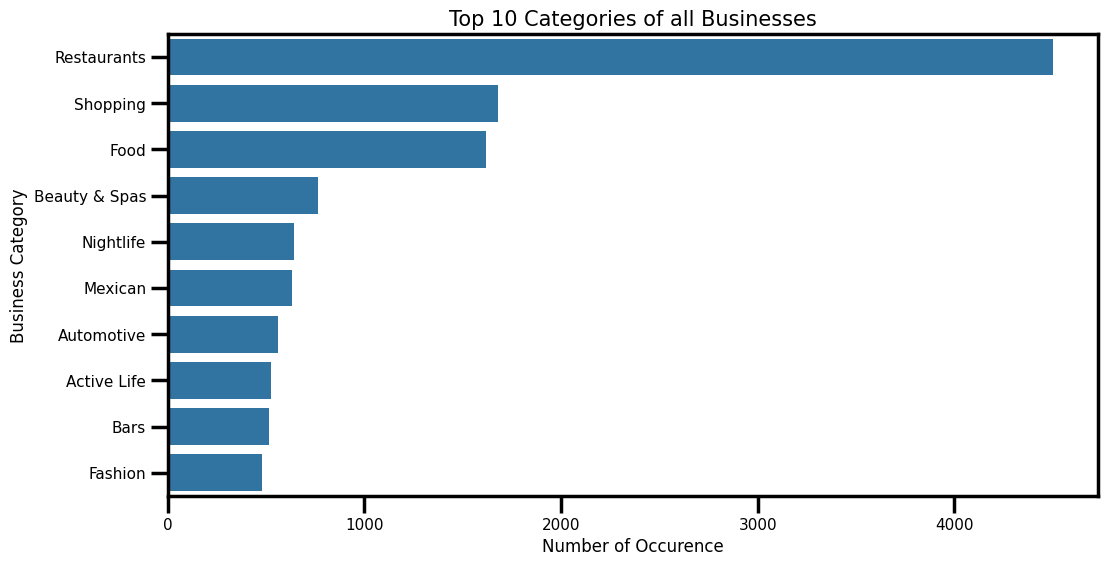

In [27]:
#top 10 occurences of business categories accross the entire dataset

#separating values in categories and saving it to a list, and removing leading and trailing white space
cat_all_list = business.business_categories.str.split(';').sum()
cat_all_list = [x.strip() for x in cat_all_list]

#converting given values to a dictionary
cat_all_dict = {}
for c in range(len(cat_all_list)):
    cat_all_dict[cat_all_list[c]] = cat_all_list.count(cat_all_list[c])

#converting the given dictionary to a DataFrame with all categories
cat_all = pd.DataFrame.from_dict(data = cat_all_dict, orient = 'index')
cat_all.reset_index(inplace = True)
cat_all.columns = ['category', 'occurance']

#visualizing the share of each category present in the whole dataset
size = cat_all.nlargest(10, 'occurance')['occurance']
label = cat_all.nlargest(10, 'occurance')['category']

#creating a barplot
plt.figure(figsize=(12,6))
sns.barplot(data = cat_all, x = size, y = label)
plt.ylabel('Business Category', fontsize=12)
plt.xlabel('Number of Occurence', fontsize=12)
plt.title('Top 10 Categories of all Businesses', fontsize=15)
plt.show();

##  How often do businesses get reviewed over time?

**Note:** The year 2013 has only reviews for the first 5 days of the year, so this year will not be taken into consideration. Year 2005 contains reviews from March 2005, and it will not be taken into consideration.

Number of reviews per year show a positive linear climb. For the sake of visualization, I picked 4 businesses from the list to analyze the trend of reviews over time. Highly reviewed businesses such as the Phoenix Sky Airport, and Pizzeria Bianco show a positive trend over years. The randomly selected two businesses from the list show a slightly different story: there was a steady positive trend of number of reviews up until the year 2010 and 2011, and the year 2012 recorded a drop in reviews for both establishments.

This steady growth in reviews can potentially show us these businesses value their customer's feedback, and are creating - as well as actively pursuing - a good business environment.

In [28]:
#checking the range of dates
print('Least recent date: ', review['date'].min())
print('Recent date: ', review['date'].max())

Least recent date:  2005-03-07
Recent date:  2013-01-05


**Visualizing Number of reviews per year**

In [29]:
#creating a new column that contains the year of review
review["date"]=  pd.to_datetime(review["date"], format='%Y-%m-%d')
review['year'] = review.date.dt.year

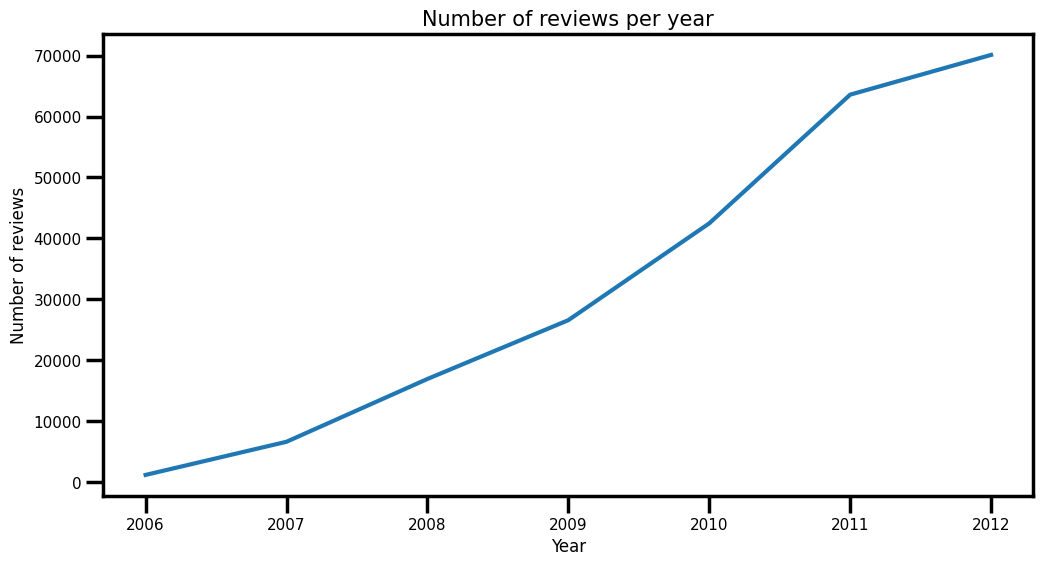

In [30]:
#number of reviews per year not including 2005 and 2013
reviews_per_year = review.groupby(['year']).size().reset_index(name='occurence').drop([0,8])

plt.figure(figsize=(12,6))
sns.lineplot(data = reviews_per_year, x = 'year', y = 'occurence')
plt.ylabel('Number of reviews', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Number of reviews per year', fontsize=15)
plt.show();

**Visualizing Number of reviews per year**

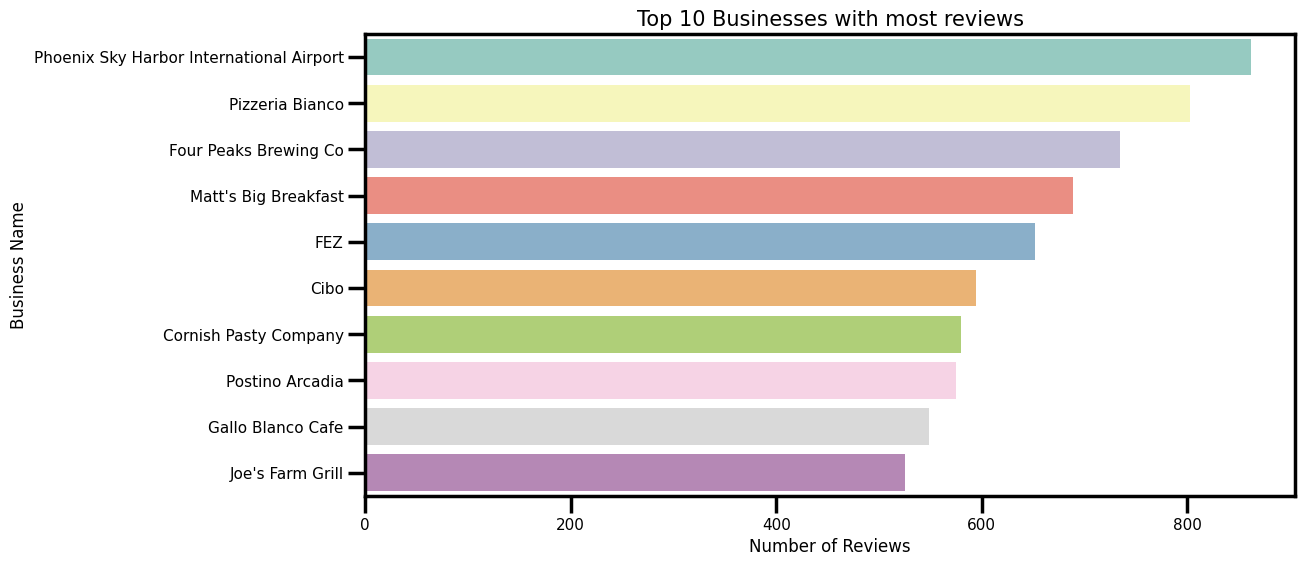

In [31]:
#visualizing top 10 businesses with most rewiews
most_reviewed = business[['business_name', 
                        'business_review_count']].reset_index().sort_values(by='business_review_count', 
                                                                            ascending=False)[:10]

plt.figure(figsize=(12,6))
sns.barplot(data = most_reviewed, x = 'business_review_count', y = 'business_name', palette = 'Set3')
plt.ylabel('Business Name', fontsize=12)
plt.xlabel('Number of Reviews', fontsize=12)
plt.title('Top 10 Businesses with most reviews', fontsize=15)
plt.show();

**Visualizing frequency of reviews per year for four businesses in the top list**

In [32]:
# Pizzeria Bianco
pizzeria_blanco = review.loc[review['business_name'] == 'Pizzeria Bianco'].sort_values(by = 'year', ascending=False)
pizzeria_blanco_counts = pizzeria_blanco.groupby(['year']).size().reset_index(name='counts').drop([0,8])
pizzeria_blanco_counts = pd.DataFrame(pizzeria_blanco_counts['counts'].values, pizzeria_blanco_counts['year'].values).reset_index()
pizzeria_blanco_counts.rename(columns={"index": "year", 0: "counts"}, inplace = True)

# Postino Arcadia
postino_arcadia = review.loc[review['business_name'] == 'Postino Arcadia'].sort_values(by = 'year', ascending=False)
postino_arcadia_counts = postino_arcadia.groupby(['year']).size().reset_index(name='counts').drop([0,7])
postino_arcadia_counts = pd.DataFrame(postino_arcadia_counts['counts'].values, postino_arcadia_counts['year'].values).reset_index()
postino_arcadia_counts.rename(columns={"index": "year", 0: "counts"}, inplace = True)

#Phoenix Sky Harbor International Airport
phoenix_sky = review.loc[review['business_name'] == 'Phoenix Sky Harbor International Airport'].sort_values(by = 'year', ascending=False)
phoenix_sky_counts = phoenix_sky.groupby(['year']).size().reset_index(name='counts').drop([7])
phoenix_sky_counts = pd.DataFrame(phoenix_sky_counts['counts'].values, phoenix_sky_counts['year'].values).reset_index()
phoenix_sky_counts.rename(columns={"index": "year", 0: "counts"}, inplace = True)

#Joe's Farm Grill
joes_farm = review.loc[review['business_name'] == "Joe's Farm Grill"].sort_values(by = 'year', ascending=False)
joes_farm_counts = joes_farm.groupby(['year']).size().reset_index(name='counts').drop([6])
joes_farm_counts = pd.DataFrame(joes_farm_counts['counts'].values, joes_farm_counts['year'].values).reset_index()
joes_farm_counts.rename(columns={"index": "year", 0: "counts"}, inplace = True)

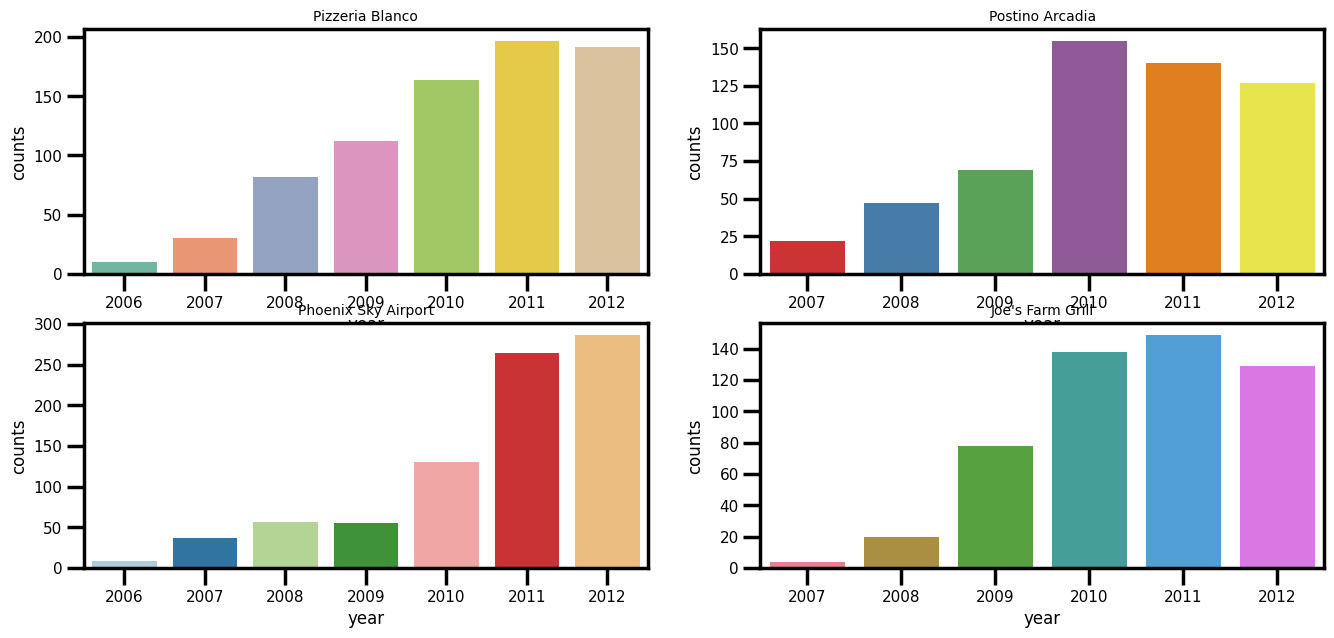

In [33]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(16, 7))

sns.barplot(data = pizzeria_blanco_counts, x = 'year', y = 'counts', palette = 'Set2', ax=ax1)
ax1.set_title('Pizzeria Blanco',fontsize=10)

sns.barplot(data = postino_arcadia_counts,x = 'year', y = 'counts', palette = 'Set1', ax=ax2)
ax2.set_title('Postino Arcadia',fontsize=10)

sns.barplot(data = phoenix_sky_counts,x = 'year', y = 'counts', palette = 'Paired', ax=ax3)
ax3.set_title('Phoenix Sky Airport',fontsize=10)

sns.barplot(data = joes_farm_counts,x = 'year', y = 'counts', palette = 'husl', ax=ax4)
ax4.set_title("Joe's Farm Grill",fontsize=10)

plt.show();

##  How do the categories of trending and top reviewed businesses differ?

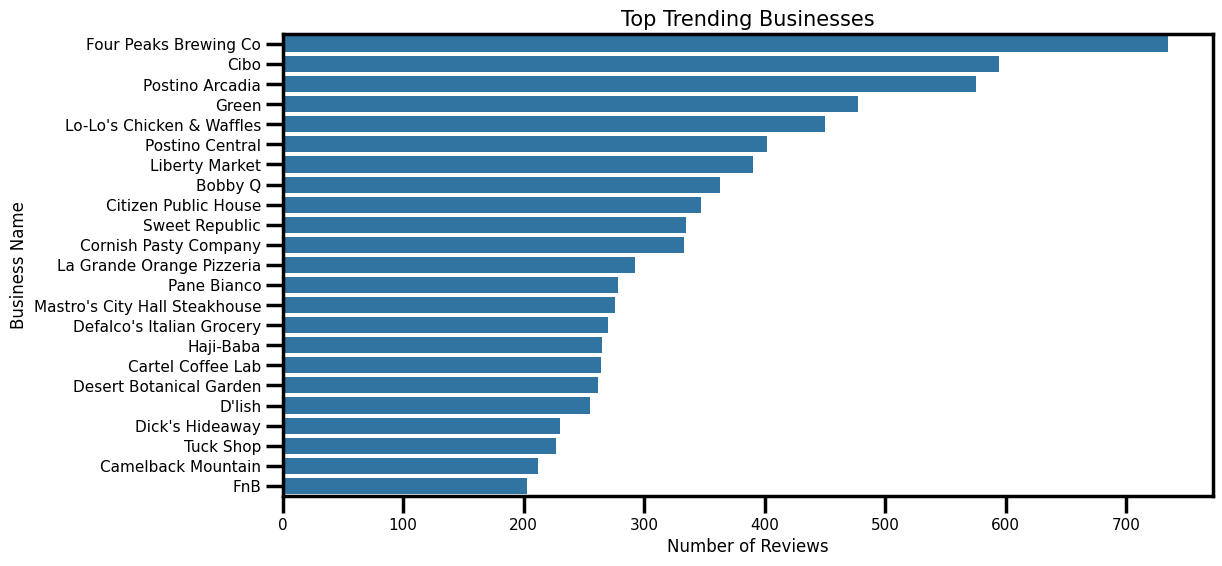

In [35]:
#setting the condition and creating a dataframe of trending businesses
trend_cond = review[(review['year'] >= 2010) & 
                    (review['business_stars'] > 4) & 
                    (review['business_review_count'] > 200)].drop_duplicates(subset = ['business_name'])

top_trending = trend_cond[['business_name', 
                           'business_stars', 
                           'year', 
                           'business_categories',
                          'business_review_count']].sort_values(by = 'business_review_count', ascending = False)

#plot the top trending
plt.figure(figsize=(12,6))
sns.barplot(data = top_trending, x = 'business_review_count', y = 'business_name')
plt.ylabel('Business Name', fontsize=12)
plt.xlabel('Number of Reviews', fontsize=12)
plt.title('Top Trending Businesses', fontsize=15)
plt.show();

In [36]:
# Trending reflects what's hot now, while top reviewed shows what's consistently good over time. 
# Both offer different perspectives on business performance and consumer preferences.

In [37]:
#separating values in categories and saving it to a list, and removing leading and trailing white space
cat_top_trend_list = top_trending.business_categories.str.split(';').sum()
cat_top_trend_list = [x.strip() for x in cat_top_trend_list]

#converting given values to a dictionary
cat_top_trend_dict = {}
for c in range(len(cat_top_trend_list)):
    cat_top_trend_dict[cat_top_trend_list[c]] = cat_top_trend_list.count(cat_top_trend_list[c])

#converting the given dictionary to a DataFrame with categories of top trending businesses
cat_top_trend = pd.DataFrame.from_dict(data = cat_top_trend_dict, orient = 'index')
cat_top_trend.reset_index(inplace = True)
cat_top_trend.columns = ['category', 'occurance']
cat_top_trend = cat_top_trend.sort_values(by='occurance', ascending=False).reset_index().drop(columns='index')

In [42]:
#combining categories with >2 occurance in a 'Other' category
cat_top_trend.loc[8] = ['Other Categories', 28]
cat_top_trend = cat_top_trend[(cat_top_trend['occurance']!= 1) & (cat_top_trend['occurance']!= 2)]

cat_top_rated = cat_top_rated.sort_values(by='occurance', ascending=False).reset_index().drop(columns='index')

cat_top_rated = cat_top_rated[(cat_top_rated['occurance']!= 1) & (cat_top_rated['occurance']!= 2)]

cat_top_rated.loc[10] = ['Other Categories', 29]

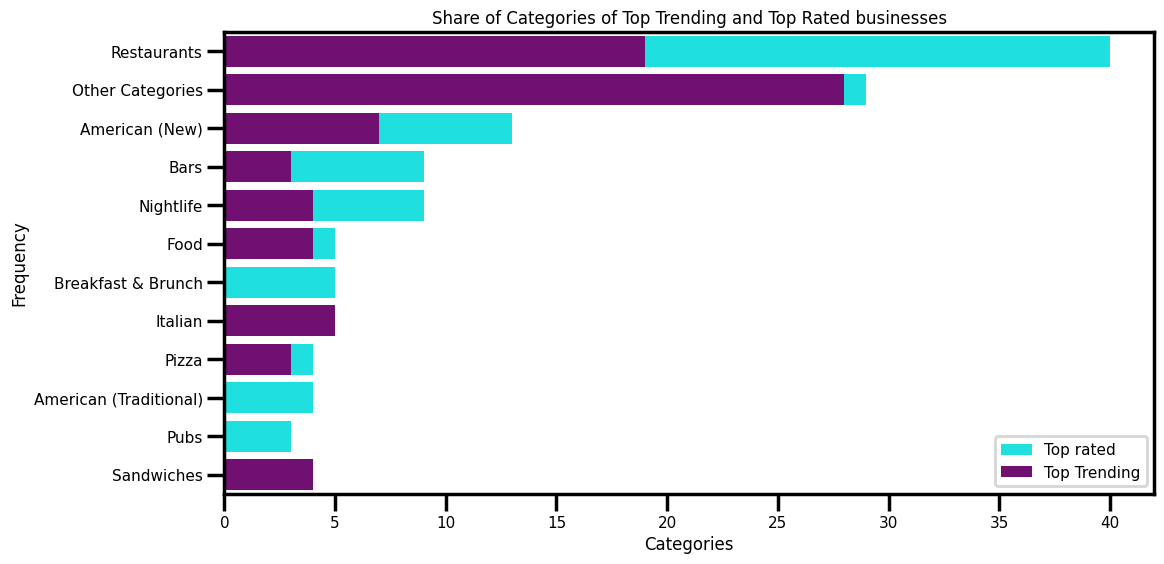

In [43]:
#visualizing categories of top trending and top rated businesses
ax = plt.subplots(figsize=(12,6))
 
ax = sns.barplot(x = cat_top_rated['occurance'], 
                 y = cat_top_rated['category'], 
                 color = 'cyan', label = 'Top rated')
ax = sns.barplot(x = cat_top_trend['occurance'], 
                 y = cat_top_trend['category'], 
                 color = 'purple', label = 'Top Trending')

ax.set(xlabel = 'Categories', ylabel = 'Frequency')
plt.title('Share of Categories of Top Trending and Top Rated businesses')

plt.legend()
plt.show();

# Which business categories get bad reviews?

**Note:** For the sake of interpretation only the top 7 categories were chosen for the visualization.

When looking at all categories of businesses that get less than 2 stars per review, the highest number of these reviews, almost 50%, goes to Restaurants, followed by Shopping, and Food. By looking at categories of top 30 businesses with an aggregated business star less than 2, there is no difference in categories, except the presence of the Automotive category. The highest number of bad reviews is US Airways with 95 1-star review, whereas the mean number of 1-star reviews is 43.
Again, this indicates that the dominant category in the dataset is Restaurants, and is most often reviewed.

In [44]:
#filtering bad reviews and creating a dataframe
bad_stars_cond = review[(review['stars'] < 2)].drop_duplicates(subset = ['business_name'])
bad_stars = bad_stars_cond[['business_name','stars','business_categories']]

#separating categories and creating a list, removing leading and trailing white space
bad_reviews_list = bad_stars.business_categories.str.split(';').sum()
bad_reviews_list = [x.strip() for x in bad_reviews_list]

#creating a dictionary from list
bad_reviews_dict = {}
for c in range(len(bad_reviews_list)):
    bad_reviews_dict[bad_reviews_list[c]] = bad_reviews_list.count(bad_reviews_list[c])
    
#creating a dataframe from dictionary
cat_bad_reviews = pd.DataFrame.from_dict(data = bad_reviews_dict, orient = 'index')
cat_bad_reviews.reset_index(inplace = True)
cat_bad_reviews.columns = ['category', 'occurance']
cat_bad_reviews = cat_bad_reviews.sort_values(by='occurance', ascending=False).reset_index().drop(columns='index')

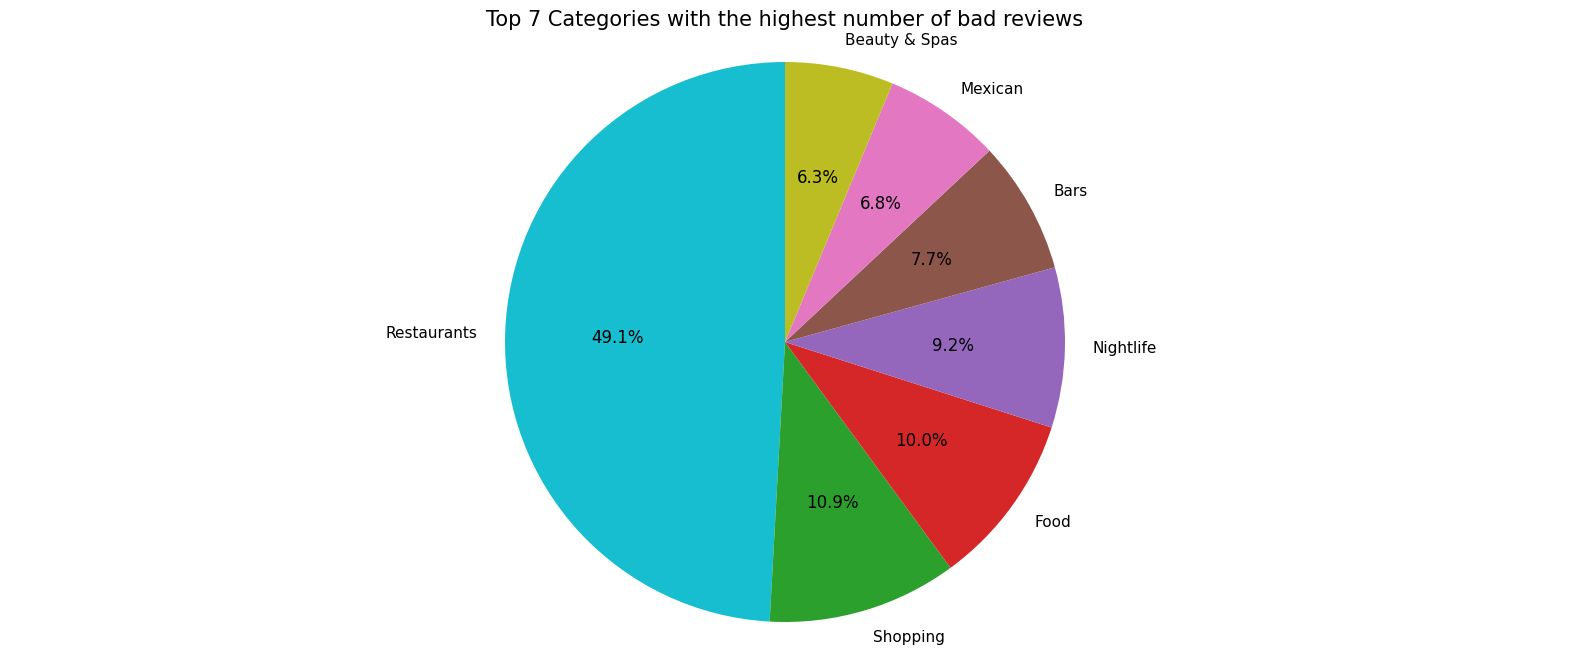

In [45]:
#visualizing categories of bad reviews
size = cat_bad_reviews.nlargest(7, 'occurance')['occurance']
label = cat_bad_reviews.nlargest(7, 'occurance')['category']
cmap = plt.get_cmap("tab10")
colors = cmap(np.array([10, 2, 3, 4, 5, 6, 8]))

fig1, ax1 = plt.subplots(figsize=(20,8))
ax1.pie(size,labels=label, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.axis('equal')
plt.title('Top 7 Categories with the highest number of bad reviews', fontsize = 15)
plt.show()

In [46]:
len_occur = []
i = 1

while i < 7:
    occur = len(cat_bad_reviews[cat_bad_reviews['occurance'] == i])
    len_occur.append(occur)
    i += 1

print('Sum of number reviews per category for values 1,2,3,4,5 and 6: ', sum(len_occur))

Sum of number reviews per category for values 1,2,3,4,5 and 6:  237


**Visualizing businesses with the highest number of bad reviews**

# problem i faced here and how i solved it 

In [51]:

# #setting the condition and creating a dataframe of businesses with the highest number of bad reviews
# bad_stars_cond = review[review['stars'] < 2]
# bad_stars = bad_stars_cond[['business_name','business_categories','stars', 'text']]
# bad_stars = bad_stars.business_name.value_counts().reset_index().rename(columns = {'index':'business_name', 'business_name':'count'})
# bad_stars = bad_stars.sort_values(by='count', ascending=False)



In [ ]:
# bad_stars = bad_stars.business_name.value_counts().reset_index().rename(columns = {'index':'business_name', 'business_name':'count'})
# In this line:
# value_counts() created a Series with:
# Index: business names
# Values: count of reviews
# reset_index() turned this into a DataFrame with:
# First column: original index (business names)
# Second column: counts
# Then rename() tried to:
# Rename the first column from 'index' to 'business_name'
# Rename the second column from 'business_name' to 'count'
# The problem occurred because:
# The second column was already named 'business_name' (not 'index')
# So after renaming, you ended up with two columns both named 'count'
# This duplicate 'count' column name caused the error when you tried to sort the DataFrame.
# The solution avoids this by clearly naming the columns without creating any duplicates.

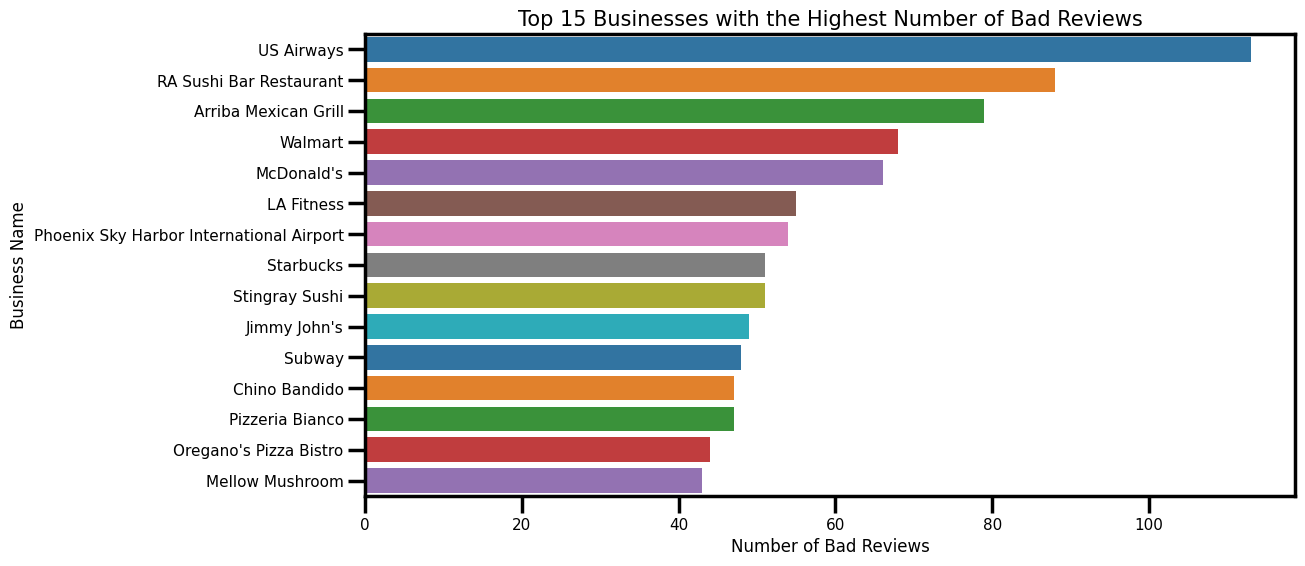

In [52]:
# Assuming 'review' is your DataFrame
# Setting the condition and creating a DataFrame of businesses with the highest number of bad reviews
bad_stars_cond = review[review['stars'] < 2]
bad_stars = bad_stars_cond[['business_name', 'business_categories', 'stars', 'text']]

# Counting the number of bad reviews per business
bad_stars_count = bad_stars['business_name'].value_counts().reset_index()
bad_stars_count.columns = ['business_name', 'count']

# Sorting the businesses by the number of bad reviews
bad_stars_count = bad_stars_count.sort_values(by='count', ascending=False)

# Visualizing the top 15 businesses with the highest number of bad reviews
plt.figure(figsize=(12, 6))
sns.barplot(data=bad_stars_count.nlargest(15, 'count'), x='count', y='business_name', palette='tab10')
plt.ylabel('Business Name', fontsize=12)
plt.xlabel('Number of Bad Reviews', fontsize=12)
plt.title('Top 15 Businesses with the Highest Number of Bad Reviews', fontsize=15)
plt.show()

#  What are the most common words in bad reviews? 

In [58]:
#creating a dataframe with only 1-star reviews
bad_words_cond = review[review['stars'] == 1]
bad_words = bad_words_cond[['business_name',
                            'stars', 
                            'text', 
                            'business_categories']].reset_index().drop(columns='index')

In [59]:
print('Shape of the dataframe: ', bad_words.shape)

Shape of the dataframe:  (17348, 4)


In [66]:
%%time
from tqdm.notebook import tqdm


# Ensure you have the model loaded
if 'nlp' not in globals():
    nlp = spacy.load('en_core_web_sm')

# Function to process text in batches
# Processes each batch of texts using nlp.pipe,
# which applies the spaCy model to the text but disables the parser 
# and named entity recognition (NER) components to speed up processing.
# Collects and returns all processed documents.
def process_text_batch(texts, batch_size=1000):
    docs = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Processing batches"):
        batch = texts[i:i+batch_size]
        docs.extend(list(nlp.pipe(batch, disable=['parser', 'ner'])))
    return docs


# Process the text
doc = process_text_batch(bad_words['text'])

# Print the number of processed documents
print(f"Processed {len(doc)} documents")

Processing batches:   0%|          | 0/18 [00:00<?, ?it/s]

Processed 17348 documents
CPU times: total: 3min 22s
Wall time: 5min 1s


### Key Points

- **`doc`**: This is the list of processed text documents. Each item in `doc` is a processed version of a text from `bad_words['text']`.
- **Batch Processing**: Breaking the data into smaller batches helps manage memory and processing time.
- **Disabling Unnecessary Components**: Disabling parts of the spaCy pipeline that are not needed (like the parser and NER) speeds up the processing.
- **tqdm**: This library shows a progress bar, making it easier to track the progress of the processing.
##### Each item in doc is a tokenized version of the corresponding sentence in bad_words['text'].

### Example

Suppose `bad_words['text']` contains the following list of sentences:
```python
bad_words = {
    'text': [
        "This is a bad example.",
        "Another example with some bad words.",
        "A final bad sentence."
    ]
}

doc = process_text_batch(bad_words['text'])
for processed_doc in doc:
    print([token.text for token in processed_doc])
['This', 'is', 'a', 'bad', 'example', '.']
['Another', 'example', 'with', 'some', 'bad', 'words', '.']
['A', 'final', 'bad', 'sentence', '.']




## Key Learnings from Processing Text Data with spaCy and tqdm

### spaCy Performance
- spaCy is powerful but can be slow and resource-intensive for large datasets.
- Full NLP pipeline (tokenization, tagging, parsing, NER) can be time-consuming.

### tqdm Effectiveness
- tqdm is a lightweight progress bar that shows iteration progress without processing data.
- It adds minimal overhead and improves process visibility.

### Why tqdm Helped
- Showed progress, making the process feel more responsive and reliable.

### Effective Optimization Strategies
1. **Batch Processing**: Breaking data into smaller chunks reduces memory usage and improves tracking.
2. **Disabling Unnecessary Components**: Skipping steps like parsing and NER speeds up processing.
3. **Progress Visualization**: tqdm's visual feedback made the process more manageable.

### Memory and Computational Constraints
- Processing all data at once can cause memory issues and long processing times.
- Batching with tqdm improved memory management and progress visibility.

### Summary
- spaCy is effective but can be slow for large datasets.
- Optimizations (batching, disabling components) and tqdm's progress bar made the process more efficient and user-friendly.

### Benefits
- Improved understanding of code efficiency and resource usage.
- Better planning for future tasks with large datasets.

This approach helped measure NLP processing efficiency, understand computational demands, and plan for future optimizations.

In [69]:
#extract all the properties of each word
def extract_tokens(doc:spacy.tokens.doc.Doc):
    """Extract tokens and metadata from individual spaCy doc.
    This function will iterate over the tokens in a single doc 
    and will extract various attributes such as the lemma, pos, entity and tag."""
    
    return [
        (i.text, i.i, i.lemma_, i.ent_type_, i.tag_, 
         i.dep_, i.pos_, i.is_stop, i.is_alpha, 
         i.is_digit, i.is_punct) for i in doc]

#define a function to apply the function above to all documents and store the outputs in a Pandas dataframe .
def df_tokens(doc):
    """Extract tokens and metadata from list of spaCy docs.
    Function to apply the function above to all documents 
    and store the outputs in a Pandas dataframe ."""
    
    cols = [
        "doc_id", "token", "token_order", "lemma", 
        "ent_type", "tag", "dep", "pos", "is_stop", 
        "is_alpha", "is_digit", "is_punct"
    ]
    
    meta_df = []
    for ix, d in enumerate(doc):
        meta = extract_tokens(d)
        meta = pd.DataFrame(meta)
        meta.columns = cols[1:]
        meta = meta.assign(doc_id = ix).loc[:, cols]
        meta_df.append(meta)
        
    return pd.concat(meta_df)  

## EXPLAINING THE ABOVE CODE
extract_tokens(docs[0])

[
    ('This', 0, 'this', '', 'DT', 'nsubj', 'DET', False, True, False, False),
    ('is', 1, 'be', '', 'VBZ', 'ROOT', 'VERB', True, True, False, False),
    ('a', 2, 'a', '', 'DT', 'det', 'DET', True, True, False, False),
    ('bad', 3, 'bad', '', 'JJ', 'amod', 'ADJ', False, True, False, False),
    ('example', 4, 'example', '', 'NN', 'attr', 'NOUN', False, True, False, False),
    ('.', 5, '.', '', '.', 'punct', 'PUNCT', False, False, False, True)
]


df_tokens Function:
This function processes each doc and stores the extracted information in a Pandas DataFrame.

| doc_id |   token   | token_order |   lemma  | ent_type |  tag  |  dep  |  pos  | is_stop | is_alpha | is_digit | is_punct |
|--------|-----------|-------------|----------|----------|-------|-------|-------|---------|----------|----------|----------|
|      0 | This      |           0 | this     |          | DT    | nsubj | DET   |   False |     True |    False |    False |
|      0 | is        |           1 | be       |          | VBZ   | ROOT  | VERB  |    True |     True |    False |    False |
|      0 | a         |           2 | a        |          | DT    | det   | DET   |    True |     True |    False |    False |
|      0 | bad       |           3 | bad      |          | JJ    | amod  | ADJ   |   False |     True |    False |    False |
|      0 | example   |           4 | example  |          | NN    | attr  | NOUN  |   False |     True |    False |    False |
|      0 | .         |           5 | .        |          | .     | punct | PUNCT |   False |    False |    False |     True |
|      1 | Another   |           0 | another  |          | DT    | amod  | DET   |   False |     True |    False |    False |
|      1 | example   |           1 | example  |          | NN    | nsubj | NOUN  |   False |     True |    False |    False |
|      1 | with      |           2 | with     |          | IN    | prep  | ADP   |   False |     True |    False |    False |
|      1 | some      |           3 | some     |          | DT    | det   | DET   |    True |     True |    False |    False |
|      1 | bad       |           4 | bad      |          | JJ    | amod  | ADJ   |   False |     True |    False |    False |
|      1 | words     |           5 | word     |          | NNS   | pobj  | NOUN  |   False |     True |    False |    False |
|      1 | .         |           6 | .        |          | .     | punct | PUNCT |   False |    False |    False |     True |

The extract_tokens function extracts detailed information about each token in a single spaCy document.
The df_tokens function applies extract_tokens to a list of documents and compiles the information into a Pandas DataFrame, including a document ID for each token.
The resulting DataFrame contains columns for token text, position, lemma, entity type, POS tags, dependency relations, and other attributes for each token in each document.


In [76]:
# Container for Text and Annotations: A Doc object is created by processing a string of text with a spaCy model. 
# It contains the original text and all the annotations (like tokens, part-of-speech tags, named entities, etc.) 
# that spaCy's pipeline components add to it.

In [73]:
# Process the document tokens and create a new DataFrame
clean_doc = df_tokens(doc)

# Display the first few rows of the resulting DataFrame
clean_doc.head()

,doc_id,token,token_order,lemma,ent_type,tag,dep,pos,is_stop,is_alpha,is_digit,is_punct
0,0,U,0,u,,PRP,,PRON,False,True,False,False
1,0,can,1,can,,MD,,AUX,True,True,False,False
2,0,go,2,go,,VB,,VERB,True,True,False,False
3,0,there,3,there,,RB,,ADV,True,True,False,False
4,0,n,4,n,,CC,,CCONJ,False,True,False,False


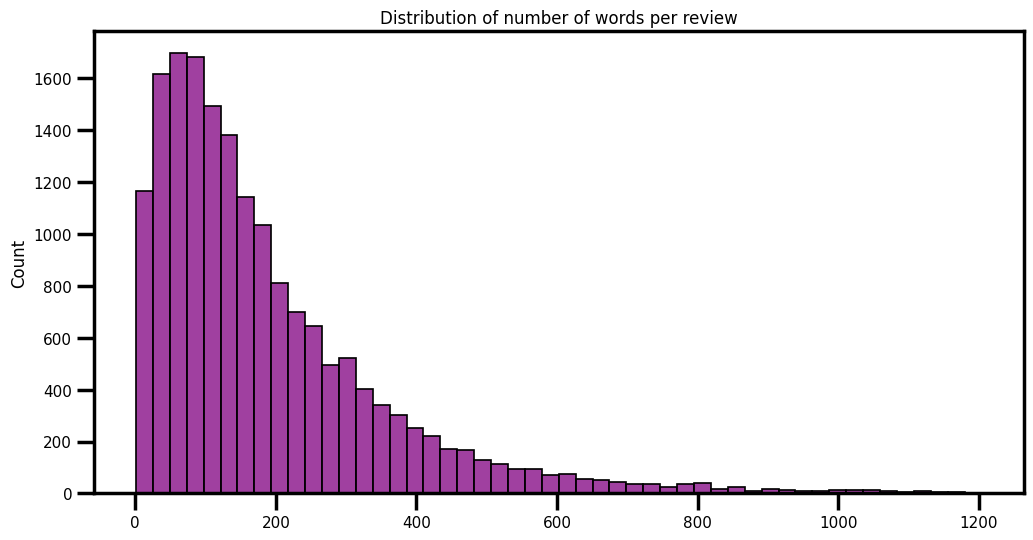

In [74]:
#visualizing distribution of number of words per doc

plt.figure(figsize=(12,6))
sns.histplot(clean_doc.groupby("doc_id").size(), bins = 50, color = 'purple')
plt.title('Distribution of number of words per review', fontsize = 12)
plt.show();

   doc_id  token  token_order  lemma ent_type  tag dep    pos  is_stop  \
0       0      U            0      u           PRP       PRON    False   
1       0    can            1    can            MD        AUX     True   
2       0     go            2     go            VB       VERB     True   
3       0  there            3  there            RB        ADV     True   
4       0      n            4      n            CC      CCONJ    False   

   is_alpha  is_digit  is_punct  
0      True     False     False  
1      True     False     False  
2      True     False     False  
3      True     False     False  
4      True     False     False  


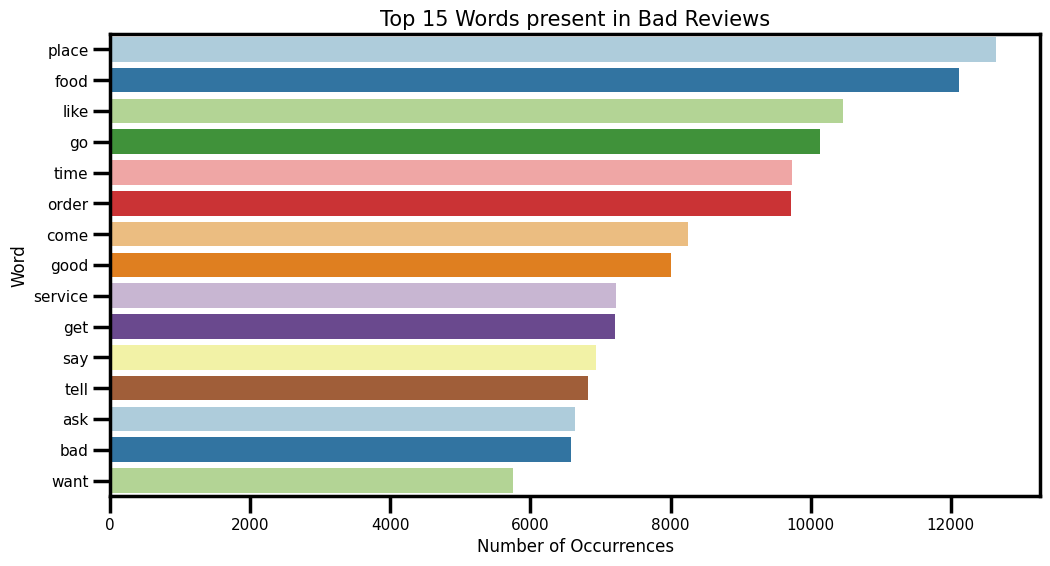

In [86]:
# Ensure clean_doc contains the necessary columns
print(clean_doc.head())

# Counting top 15 words in the corpus
top_bad_words = clean_doc.query("is_stop == False & is_punct == False").lemma.value_counts().head(19).reset_index()

# Drop specific rows if necessary
top_bad_words = top_bad_words.drop([0, 1, 10, 17])

# Rename columns for clarity
top_bad_words.columns = ['Word', 'Count']

# Plotting the data
plt.figure(figsize=(12,6))
sns.barplot(data=top_bad_words, x='Count', y='Word', palette='Paired')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.title('Top 15 Words present in Bad Reviews', fontsize=15)
plt.show()

## Fixing the Seaborn Barplot Issue

### Initial Problem
The original code didn't work because of a mismatch between the column names in the DataFrame and those specified in the `sns.barplot()` function.

### Why It Didn't Work
1. After using `value_counts().reset_index()`, the DataFrame had columns named:
   - 'index' (containing entity types)
   - 'ent_type' (containing counts)
2. The `sns.barplot()` function was trying to use 'ent_type' for x-axis and 'index' for y-axis, which didn't match the actual column names.

### Changes Made to Solve It
1. Renamed the columns in the DataFrame:
   ```python
   freq_ent.columns = ['Entity_Type', 'Count']

## Updated the sns.barplot() function to use the correct column names:
sns.barplot(data=freq_ent, x='Count', y='Entity_Type', palette='Paired')

Swapped x and y in the plot to create a horizontal bar chart:
x-axis now shows the count
y-axis now shows the entity types

### Key Takeaways
Always ensure DataFrame column names match what you're referencing in plotting functions.
Use descriptive column names to avoid confusion.
Pay attention to the orientation of your plot (horizontal vs. vertical bars).
Properly labeling axes and providing a title makes the plot more informative and professional.

In [ ]:
# this took alot of time

In [96]:
print('nice work!!!!!!')

nice work!!!!!!
